## Output variable -> y
    y -> Whether the client has subscribed a term deposit or not 
    Binomial ("yes" or "no")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\rohit\Downloads\Assignments\data science assignment\Logistic Regression\bank-full.csv", sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA

In [3]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
oi = OrdinalEncoder()
li = LabelEncoder()

In [5]:
df.iloc[:,[1,2,3,4,6,7,8,10,15]] = oi.fit_transform(df.iloc[:,[1,2,3,4,6,7,8,10,15]])
df['y'] = li.fit_transform(df['y'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0,1
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0,1
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0,1
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0,0


## Data spliting

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = df.iloc[:,1:-1]
y = df['y']

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1)

## Model Building

In [9]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [10]:
# Training model
lg.fit(xtrain, ytrain)

# Prediction
ypred = lg.predict(xtest)

## Model evaluation

In [11]:
print('Actual Y: ', ytest[:25].values)
print('Predict Y:', ypred[:25])

Actual Y:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predict Y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.56      0.16      0.25      1050

    accuracy                           0.89      9043
   macro avg       0.73      0.57      0.59      9043
weighted avg       0.86      0.89      0.86      9043



In [14]:
confusion_matrix(ytest, ypred)

array([[7864,  129],
       [ 885,  165]], dtype=int64)

Text(33.0, 0.5, 'Predicted values')

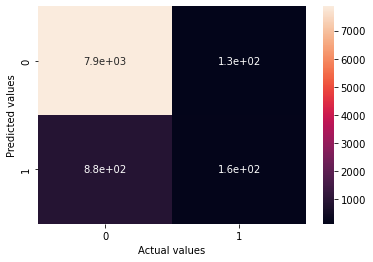

In [15]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [24]:
proba = lg.predict_proba(xtest)[:,1]
proba

array([0.03354081, 0.04862001, 0.30577878, ..., 0.02547212, 0.00064348,
       0.05066678])

In [25]:
from sklearn.metrics import roc_auc_score,roc_curve, accuracy_score

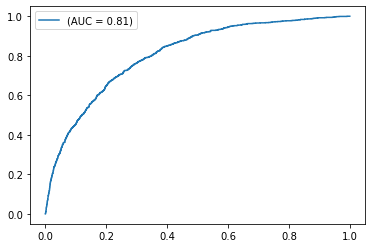

In [26]:
auc = roc_auc_score(ytest, proba)

fpr, tpr, threshold = roc_curve(ytest, proba)

plt.plot(fpr, tpr, label= '(AUC = %0.2f)'%auc)
plt.legend()

In [27]:
threshold

array([1.99983922e+00, 9.99839217e-01, 9.99733677e-01, ...,
       2.29800258e-04, 2.23176549e-04, 1.12341826e-07])

In [28]:
accuracy = []

for i in threshold:
    ypred = np.where(proba > i, 1, 0)
    accuracy.append(accuracy_score(ytest,ypred))

final_threshold = pd.concat([pd.Series(threshold), pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
154,4.814332e-01,0.888090
152,4.841343e-01,0.888090
148,4.872468e-01,0.888090
147,4.896307e-01,0.888090
144,4.951848e-01,0.888090
...,...,...
1538,4.622952e-03,0.147296
1539,4.512991e-03,0.147186
1540,2.298003e-04,0.123410
1541,2.231765e-04,0.123300


In [21]:
from sklearn.preprocessing import binarize

In [32]:
z = binarize([proba], threshold= 0.4814332)[0]
z

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
print(classification_report(ytest, z))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.56      0.17      0.26      1050

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043

